# Assignment 6 - Graph drawing and network analysis

In this assignment you will get to work with graphs using the [graph-tool python module](https://graph-tool.skewed.de/).

Learning goals are:

* perform basic network analysis to create derived graph properties,
* visualize graphs and their properties.

If you require an introduction to basic graph notions, consider to read the so-titled section in [Maël Fabien
's blog post](https://towardsdatascience.com/introduction-to-graphs-part-1-2de6cda8c5a5) on this subject. While graph theory and algorithms can lead to fairly deep mathematical discussion, the basic definitions and much practical use of graph data is quite easy to get started with.

For further background on `graph-tool` refer to the [graph tutorial slides](https://stevenbergner.github.io/Teaching/cmpt767/graph-tutorial) and the [tutorial notebook](https://stevenbergner.github.io/Teaching/cmpt767/graph-tool-tutorial-todo.ipynb). See the [lab setup](#Environment-setup-details) on how you can use graph tool on the lab machines.

In [1]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
%matplotlib inline

import graph_tool.all as gt
print("graph-tool version: {}".format(gt.__version__.split(' ')[0]))

/Users/zhangchao/opt/anaconda3/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:1494: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


graph-tool version: 2.29


# Problem 1: Power grid analysis

In [26]:
g = gt.collection.data['power']
display(Markdown(gt.collection.descriptions['power']))

Power grid: An undirected, unweighted network representing the topology of the Western States Power Grid of the United States. Data compiled by D. Watts and S. Strogatz and made available on the web `here <http://cdg.columbia.edu/cdg/datasets>`_. Please cite D. J. Watts and S. H. Strogatz, Nature 393, 440-442 (1998). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_.

 In this graph an edge represents a power supply line. A node is either a generator, a transformator, or a substation.
 
**Task 1a**: Create a drawing of this graph that emphasizes nodes that have more than 10 incident power supply lines. Set the size of all other nodes to 0, but retain visibility of the power lines.

In [34]:
total_degrees = g.degree_property_map("total")
# indeg.a = 4 * (np.sqrt(indeg.a) * 0.5 + 0.4)
total_degrees[1]

4

In [35]:
for i in range(len(list(total_degrees))):
    if total_degrees[i] <= 10:
        total_degrees[i] = 0

In [30]:
total_degrees[1]

4

In [12]:
list(total_degrees)[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

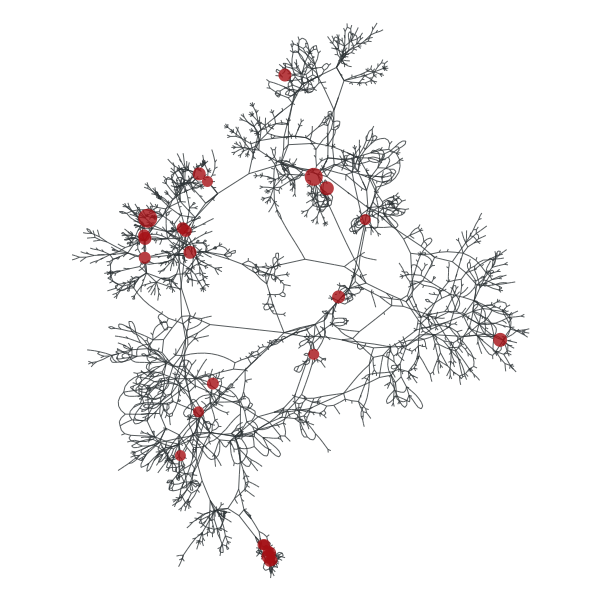

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x10bb81b90, at 0x1a30b5ce10>

In [18]:
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos = pos, vertex_size=total_degrees, edge_pen_width=1)

In [6]:
for v in g.iter_vertices():
    print(v)
for e in g.iter_edges():
    print(e)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [36]:
temp_v = g.vertex(2)

for e in temp_v.out_edges():
    print(e)
for w in temp_v.out_neighbors():
    print(w)

(2, 3583)
3583


In [37]:
total_degrees = g.get_total_degrees(g.get_vertices())

In [38]:
total_degrees

array([3, 4, 1, ..., 2, 2, 2], dtype=uint64)

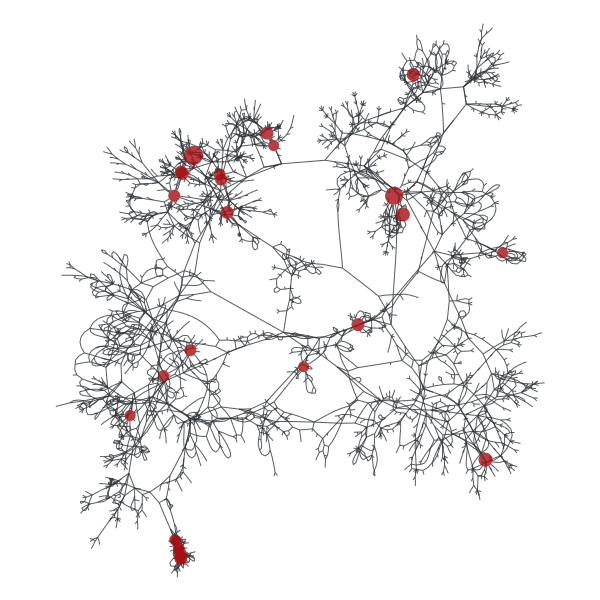

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2c34d57b8, at 0x7fc2b30d7ba8>

In [189]:
# TODO

**Task 1b:** Identify one of the centrality measures that can be used to indicate powerlines that act as a bridge between different parts of the network. Use this to emphasize structurally important nodes and powerlines.

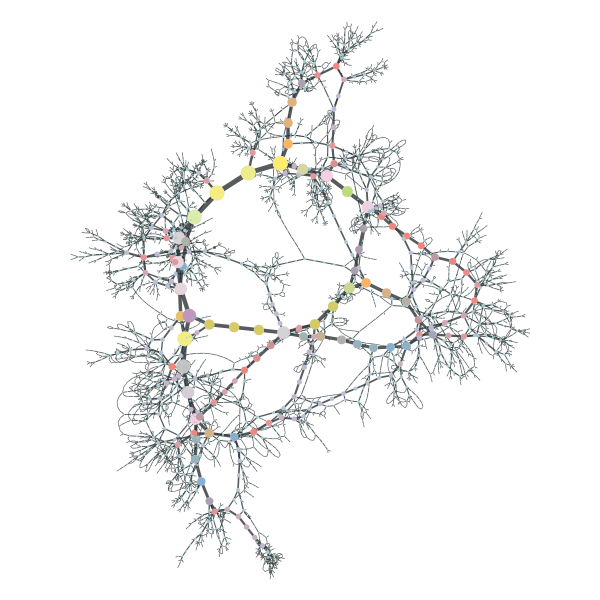

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x10bb81b90, at 0x1a30b5ce10>

In [65]:
g.set_edge_filter(None)
bv, be = gt.betweenness(g)
gt.graph_draw(g, pos=pos, vertex_fill_color=bv, edge_pen_width=gt.prop_to_size(be, mi=0.5, ma=5), 
              vertex_size=gt.prop_to_size(bv, mi=0, ma=15))

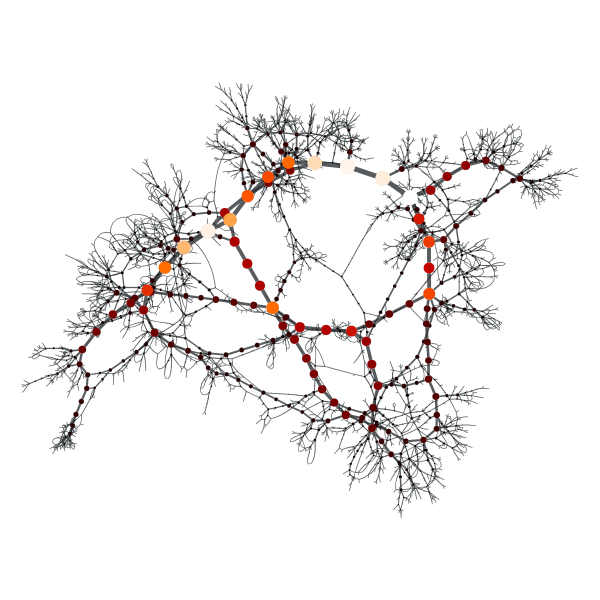

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2c34d57b8, at 0x7fc2c34b7978>

In [195]:
# TODO find the centrality measures fucntion 


# Problem 2: Small social graph visualization

In [68]:
X_knows = {
    'Mary': ['Peter', 'Albert', 'DavidF', 'Peter'],
    'Judy': ['Bob', 'Alan'],
    'Peter': ['Mary', 'DavidF', 'Jon'],
    'DavidF': ['Albert', 'Joseph', 'Peter', 'Mary'],
    'Jon': ['Peter', 'Joseph', 'DavidE'],
    'DavidE': ['Jon', 'Joseph', 'Albert'],
    'Joseph': ['DavidE', 'Jon', 'DavidF'],
    'Bob': ['Judy', 'Alan'],
    'Alan': ['Bob', 'Mary', 'Judy'],
    'Albert': ['DavidF', 'Mary', 'DavidE'],
}

**Task**: Create an undirected graph that represents the personal network above, remove parallel edges, and draw using a layout that resembles the tidy example given in the [lecture](../index.html) and as shown further below.

In [110]:
from collections import defaultdict 
dict = defaultdict(list)
for n in X_knows:
    for k in X_knows[n]:
        if k in dict[n]:
            continue
        if n not in dict[k]:
            dict[n].append(k)
print(dict)

defaultdict(<class 'list'>, {'Mary': ['Peter', 'Albert', 'DavidF'], 'Peter': ['DavidF', 'Jon'], 'Albert': [], 'DavidF': ['Albert', 'Joseph'], 'Judy': ['Bob', 'Alan'], 'Bob': ['Alan'], 'Alan': ['Mary'], 'Jon': ['Joseph', 'DavidE'], 'Joseph': [], 'DavidE': ['Joseph', 'Albert']})


In [111]:
# TODO adjust the code below and add to it
    
g = gt.Graph(directed=False)
v_name = g.add_edge_list(((n,k) for n in dict for k in dict[n]),
                         hashed=True)
pos = gt.sfdp_layout(g)
# au.rotate_layout(pos, "Alan", "Mary", v_name)

In [104]:
vprops = dict(
    # TODO find suitable vertex properties for graph_draw (see gt reference docs)
)

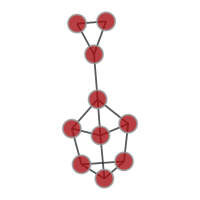

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1a4ab916d0, at 0x1a4ab91e50>

In [112]:
gt.graph_draw(
    g,
    pos=pos,
    vprops=vprops,
    output_size=(200,200), # adjust to fit screen
    fit_view=.9,
    fmt="svg"
)

After adjusting the code above you should be able to obtain a result like this.
![](graph.svg)

# Problem 3: Facebook graph analysis

For this question we will work with a real social graph of facebook friendship connections. Please download [`facebook_combined.txt` from SNAP](https://snap.stanford.edu/data/ego-Facebook.html), the Stanford Large Network Dataset Collection and create a `Graph` object with `graph-tool`. The dataset contains the ego networks of 10 facebook users, i.e. it contains the ego nodes, the friends of each of these facebook users, and the connections among those friends.

Goal below is to determine influencers among the users, based on a measure of centrality and not including the ego nodes themselves.

**Task 3a:** Load the dataset and create a drawing of the graph.

In [227]:
# TODO

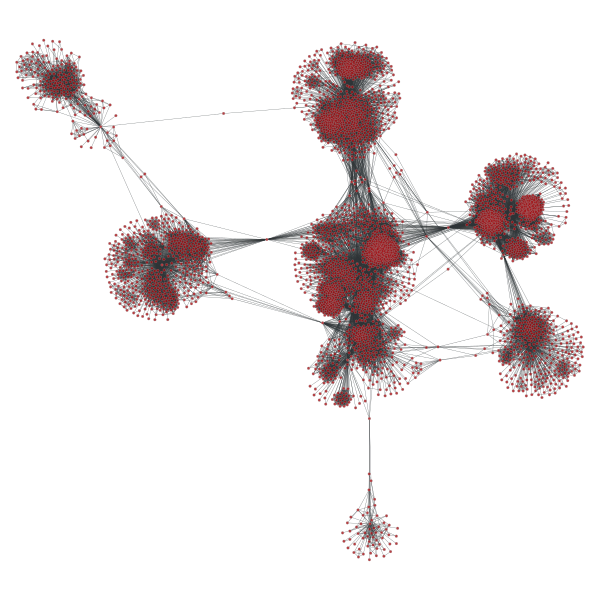

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2a1df88d0, at 0x7fc2dc176588>

In [229]:
# TODO

**Task 3b:** Calculate and show a histogram of pairwise distances among users. Internally, this distance would be computed for the shortest path of connections among any pair of users.

Use a log-scale of the frequencies to scale the histogram bars.

What is the diameter of this graph?

*Hint:* Calculating and drawing the histograms amounts to two lines of code using `gt` and `plt` modules.

In [230]:
# TODO

**Task 3c:** Determine influencers, i.e. people withing the ego network that are well connected among friends.

There are several steps to this analysis. First, remove the ego nodes. You can do this in an approximate way, simply by calculating a measure of influence of a user and removing the highest scoring nodes, assuming that these naturally are the ego nodes whose friends this network consists of.

Use `PageRank` as a measure of influence of a node.

*Step 1* - Create a drawing of a GraphView that only retains nodes with a `pagerank` $< 0.002$.

In [ ]:
# TODO

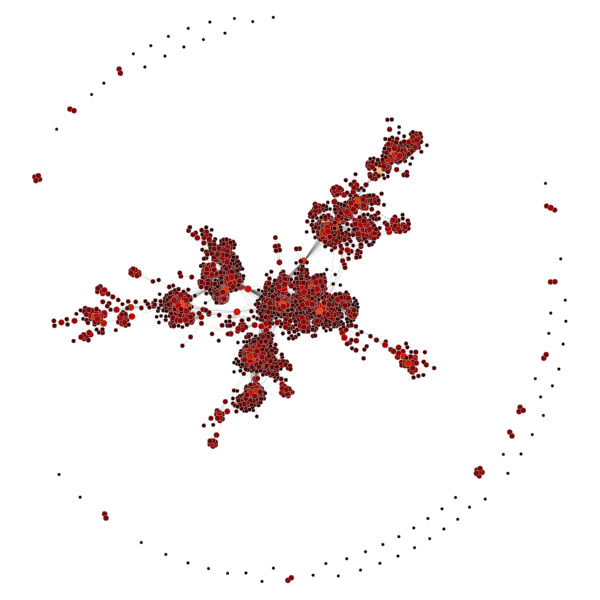

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2a1c2dfd0, at 0x7fc2a1bffc88>

In [234]:
# TODO

*Step 2* - Only retain the largest connected component of this graph, i.e. create another [`GraphView`](https://graph-tool.skewed.de/static/doc/quickstart.html#graph-views) of only this largest component.

In [237]:
# TODO

*Step 3* - Recalculate pagerank for each node, choose a threshold (e.g. 0.0005) above which only a small part of the users are selected. Create a drawing that emphasizes these users that play central roles among their friends.

In [244]:
# TODO

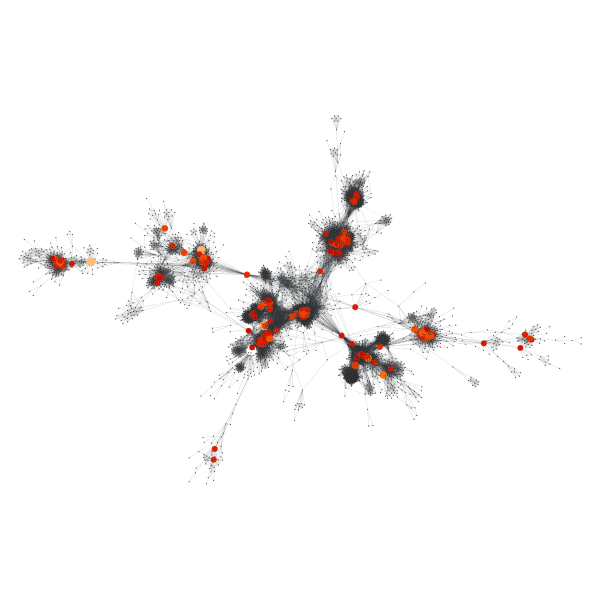

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2dc2b76a0, at 0x7fc2a1b70c50>

In [245]:
# TODO

# Environment setup details

[Setup instruction](https://git.skewed.de/count0/graph-tool/-/wikis/installation-instructions#installation-via-package-managers) are available for most environments. To use the setup in the lab, see below.

We have prepared a `conda` environment in the lab that contains all modules required for this assignment. You can activate the environment as follows:

```
conda activate /usr/shared/CMPT/big-data/condaenv/pybd
```

#### You might get an error
`CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.`
This happens, if you have not used conda before. To perform initialization once, we recommend the following steps:
```
conda init bash
conda config --set auto_activate_base false
```
If you now restart your terminal shell or simply invoke a new one by typing `bash`, you can try activating the environment, again.

# Submission instructions
Please submit [this notebook](https://github.com/sfu-db/bigdata-cmpt733/blob/master/Assignments/A6/A6.ipynb) 
to [CourSys](https://coursys.sfu.ca/2021sp-cmpt-733-g1/+a6/),
filled out with figures included.